# Imports

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
import random as rn
import seaborn as sb
sb.set_style(style="whitegrid")
sb.set_color_codes()
import scipy.ndimage
from scipy.interpolate import griddata
import numpy.ma as ma
from numpy.random import uniform, seed
from google.colab import files

# Single Blob

## Data Preparation


### Data Generation

In [11]:
mean = [0, 0]
cov = [[1, 0], [0, 1]]  # diagonal covariance
Nobjs = 500
np.random.seed(1)
x, y = np.random.multivariate_normal(mean, cov, Nobjs).T
#Add manual outlier
x[0]=3.3
y[0]=3.3
X=np.array([x,y]).T

### Data Visualisation

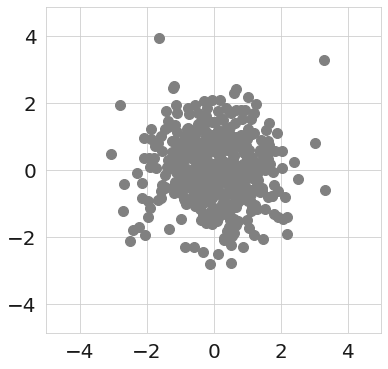

In [ ]:
fig=plt.figure(figsize=(6,6))
fig.add_subplot(111)
plt.plot(X[:,0],X[:,1],'o', markersize=10, color=[0.5,0.5,0.5])
plt.grid("off")
plt.axis("equal")
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.tick_params(direction='out', length=6, width=2, colors='k',labelsize=20)
plt.show()

### Saving in csv 

In [ ]:
label=np.zeros(500, int)
label[0]=1

dict={'1':x, '2':y, 'label':label}
df=pd.DataFrame(dict)

df.to_csv('SingleBlob.csv', sep='\t')
files.download("SingleBlob.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Train iForest on Data

This process is done on local machine.

## Obtain Anomaly Scores

In [ ]:
files.upload()
files.upload()

Saving SingleBlob.csviForestAnomalyScore_0.csv to SingleBlob.csviForestAnomalyScore_0 (1).csv


Saving SingleBlob.csviForestAnomalyScore_1.csv to SingleBlob.csviForestAnomalyScore_1.csv


{'SingleBlob.csviForestAnomalyScore_1.csv': b'pointId Ascore actuallabel\n0 0.740682 1\n1 0.44741 0\n2 0.594181 0\n3 0.504409 0\n4 0.394105 0\n5 0.596783 0\n6 0.403362 0\n7 0.470811 0\n8 0.421742 0\n9 0.403527 0\n10 0.461341 0\n11 0.430135 0\n12 0.426531 0\n13 0.42498 0\n14 0.402989 0\n15 0.415144 0\n16 0.441141 0\n17 0.405933 0\n18 0.428374 0\n19 0.495002 0\n20 0.421882 0\n21 0.480627 0\n22 0.406555 0\n23 0.533803 0\n24 0.407685 0\n25 0.396229 0\n26 0.442703 0\n27 0.406812 0\n28 0.439491 0\n29 0.412314 0\n30 0.444406 0\n31 0.40044 0\n32 0.397086 0\n33 0.516842 0\n34 0.608463 0\n35 0.47626 0\n36 0.410773 0\n37 0.525901 0\n38 0.414916 0\n39 0.413715 0\n40 0.393254 0\n41 0.406989 0\n42 0.397822 0\n43 0.414492 0\n44 0.42426 0\n45 0.431651 0\n46 0.416155 0\n47 0.397038 0\n48 0.396568 0\n49 0.413501 0\n50 0.436732 0\n51 0.420724 0\n52 0.428343 0\n53 0.433044 0\n54 0.394778 0\n55 0.45023 0\n56 0.431113 0\n57 0.455828 0\n58 0.49223 0\n59 0.436447 0\n60 0.418794 0\n61 0.567822 0\n62 0.543315 0

In [ ]:
data = pd.read_csv("SingleBlob.csviForestAnomalyScore_0.csv", delimiter=' ')
S0 = data['Ascore'].to_numpy()

data = pd.read_csv("SingleBlob.csviForestAnomalyScore_1.csv", delimiter=' ')
S1 = data['Ascore'].to_numpy()

print(np.min(S0))
print(np.max(S0))

0.40194
0.788899


## Visualise scores

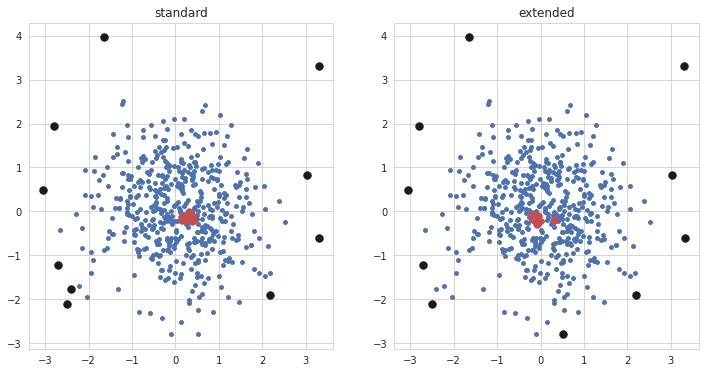

[303 359 445 499 288 489 495 178 338  94  77  82  32   4 434 491 347  40
 373 129 433  47 485  25  31 192 396 158 415 425  70  42  24 154 133 339
 115 492 146 464 383 368  78 287  81  87 379 145 239  41 327 252 441 108
 480  72  51 173 123  93  36 363 429   9 142  27 437 475 409  54 193 202
 113 283  73 439  48 232 316 125 266 410 458 418 374 402 172 377  89 336
 143  29 450  14 222  39 214 343 496 493 416 356 182 268 332 352  74 324
 391  65 134 148 184 317 413 185 253 361 346 147 141 216 399 153 120 414
 419 280 406 476 267 438 171 432  22 245  98 237  92   6 494 246 235 305
 483 213 226 114 196 176 411 313  60 417 358 161 473 257 295  38 484  44
  17  67 370 451 372 309 259 424 290 393 385 186 285 179 160 190 234 100
 131 318 442 344 306 204 162  46 440 277 165 254 479 452 218 270  69  43
 251 211 466 258 312 289  20  15 164 426 340   8 279 386 177 463 364 229
 140 345  83 387 490 457 460 136 462 394 469  13 180  12 132 298 292 241
  28 311 337 228 428 400 127 444  11  71 217 249 16

In [ ]:
ss0=np.argsort(S0)
ss1=np.argsort(S1)

f = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(x,y,s=15,c='b',edgecolor='b')
plt.scatter(x[ss0[-10:]],y[ss0[-10:]],s=55,c='k')
plt.scatter(x[ss0[:10]],y[ss0[:10]],s=55,c='r')
plt.title('standard')

plt.subplot(1,2,2)
plt.scatter(x,y,s=15,c='b',edgecolor='b')
plt.scatter(x[ss1[-10:]],y[ss1[-10:]],s=55,c='k')
plt.scatter(x[ss1[:10]],y[ss1[:10]],s=55,c='r')
plt.title('extended')
plt.show()

# print(ss0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


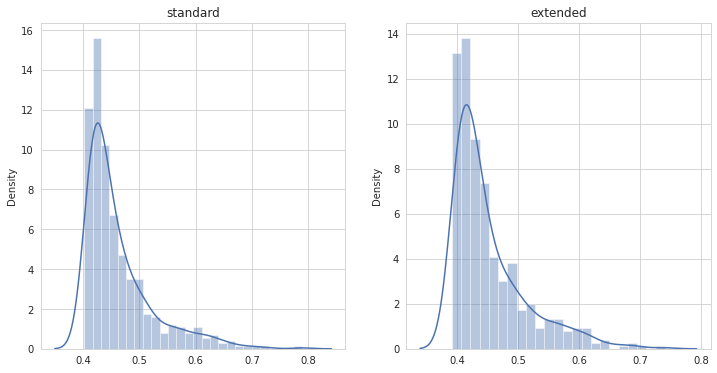

In [ ]:
f = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sb.distplot(S0, kde=True, color="b")
plt.title('standard')

plt.subplot(1,2,2)
sb.distplot(S1, kde=True, color="b")
plt.title('extended')
plt.show()

In [7]:
xx, yy = np.meshgrid(np.linspace(-5., 5., 30), np.linspace(-5., 5, 30))
X_in=np.c_[xx.ravel(), yy.ravel()]

label=np.zeros(900, int)

dict={'1':X_in[:, 0], '2':X_in[:, 1], 'label':label}
df=pd.DataFrame(dict)

df.to_csv('SingleBlob_heatmap.csv', sep='\t')
files.download("SingleBlob_heatmap.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
files.upload()
files.upload()



Saving SingleBlob_heatmap_on_SingleBlob.csviForestAnomalyScore_0.csv to SingleBlob_heatmap_on_SingleBlob.csviForestAnomalyScore_0.csv


Saving SingleBlob_heatmap_on_SingleBlob.csviForestAnomalyScore_1.csv to SingleBlob_heatmap_on_SingleBlob.csviForestAnomalyScore_1.csv


{'SingleBlob_heatmap_on_SingleBlob.csviForestAnomalyScore_1.csv': b'pointId Ascore actuallabel\n0 0.728837 0\n1 0.72701 0\n2 0.723191 0\n3 0.722396 0\n4 0.720528 0\n5 0.719673 0\n6 0.71402 0\n7 0.707935 0\n8 0.702991 0\n9 0.702191 0\n10 0.698104 0\n11 0.693469 0\n12 0.690053 0\n13 0.691725 0\n14 0.686351 0\n15 0.68106 0\n16 0.685858 0\n17 0.680773 0\n18 0.677908 0\n19 0.681046 0\n20 0.683737 0\n21 0.684474 0\n22 0.685502 0\n23 0.69112 0\n24 0.688962 0\n25 0.692098 0\n26 0.692866 0\n27 0.69064 0\n28 0.691448 0\n29 0.695737 0\n30 0.728934 0\n31 0.728491 0\n32 0.722043 0\n33 0.722042 0\n34 0.719847 0\n35 0.718087 0\n36 0.711774 0\n37 0.709859 0\n38 0.702454 0\n39 0.700081 0\n40 0.694793 0\n41 0.691741 0\n42 0.687323 0\n43 0.685368 0\n44 0.676075 0\n45 0.677404 0\n46 0.678984 0\n47 0.675421 0\n48 0.67659 0\n49 0.678569 0\n50 0.681799 0\n51 0.684056 0\n52 0.682758 0\n53 0.687877 0\n54 0.683505 0\n55 0.692684 0\n56 0.685543 0\n57 0.690795 0\n58 0.694861 0\n59 0.69273 0\n60 0.73207 0\n61 0.72

In [9]:
data = pd.read_csv("SingleBlob_heatmap_on_SingleBlob.csviForestAnomalyScore_0.csv", delimiter=' ')
S0 = data['Ascore'].to_numpy()
S0 = S0.reshape(xx.shape)

data = pd.read_csv("SingleBlob_heatmap_on_SingleBlob.csviForestAnomalyScore_1.csv", delimiter=' ')
S1 = data['Ascore'].to_numpy()
S1 = S1.reshape(xx.shape)

print(np.min(S0))
print(np.max(S0))

0.401785
0.80713


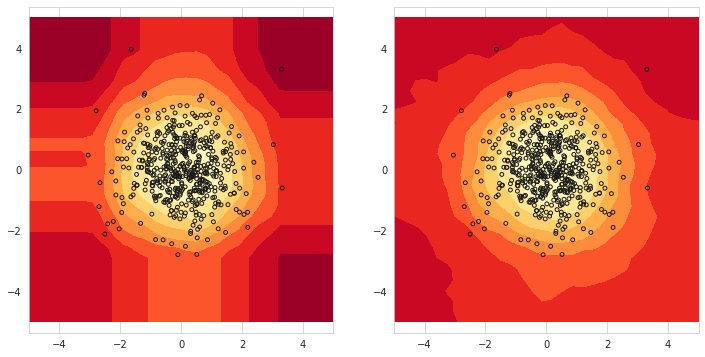

In [12]:
f = plt.figure(figsize=(12,6))

ax1 = f.add_subplot(121)
levels = np.linspace(np.min(S0),np.max(S0),10)
CS = ax1.contourf(xx, yy, S0, levels, cmap=plt.cm.YlOrRd)
plt.scatter(x,y,s=15,c='None',edgecolor='k')
plt.axis("equal")


ax2 = f.add_subplot(122)
levels = np.linspace(np.min(S1),np.max(S0),10)
CS = ax2.contourf(xx, yy, S1, levels, cmap=plt.cm.YlOrRd)
plt.scatter(x,y,s=15,c='None',edgecolor='k')
plt.axis("equal")


plt.show()